In [2]:
conda install contextily

Solving environment: done

## Package Plan ##

  environment location: /Users/chen/opt/anaconda3

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.27 |                0         131 KB
    cairo-1.14.12              |       hc4e6be7_4         860 KB
    certifi-2019.11.28         |           py37_0         156 KB
    cfitsio-3.470              |       hb33e7b4_2         823 KB
    click-plugins-1.1.1        |             py_0          11 KB
    cligj-0.5.0                |           py37_0          12 KB
    conda-4.8.1                |           py37_0         2.8 MB
    fiona-1.8.11               |   py37heeaa653_0         627 KB
    fontconfig-2.13.0          |       h5d5b041_1         202 KB
    freexl-1.0.5               |       h1de35cc_0          39 KB
    gdal-3.0.2                 |   py37hbe65578_0         1.6 MB


In [11]:
conda install descartes

Solving environment: done

## Package Plan ##

  environment location: /Users/chen/opt/anaconda3

  added / updated specs:
    - descartes


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    descartes-1.1.0            |             py_3           9 KB
    ------------------------------------------------------------
                                           Total:           9 KB

The following NEW packages will be INSTALLED:

  descartes          pkgs/main/noarch::descartes-1.1.0-py_3



descartes-1.1.0      | 9 KB      | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [298]:
import geopandas as gp
import fiona
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString

In [299]:
NY_GEO = gp.read_file("nyc/geo_export_ed1b9dba-ece4-470b-8a1e-2954c9ff29fe.shp", driver='shapefile')
CITI = pd.read_csv('201911-citibike-tripdata.csv', nrows=5000)
NY_STATION = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/Stations.csv')
#station = pd.read_csv("http://web.mta.info/developers/data/nyct/subway/Stations.csv")

In [300]:
def coord_start(row):
    return Point(row['start station longitude'], row['start station latitude'])
def coord_end(row):
    return Point(row['end station longitude'], row['end station latitude'])
def line_up(row):
    return LineString([row['start_coords'], row['geometry']])

In [301]:
coord_start = CITI_DF.apply(coord_start, axis=1)
coord_end = CITI_DF.apply(coord_end, axis=1)
BLYN = NY_GEO[(NY_GEO.boro_name == 'Brooklyn')]

In [302]:
CITI_DF = gp.GeoDataFrame(
    CITI, 
    crs = {'init': 'epsg:4326'},
    #geometry = gp.points_from_xy(CITI['end station longitude'], CITI['end station latitude']),
    )

In [303]:
CITI_DF['start_coords'] = coord_start
#CITI_DF['end_coords'] = coord_end
CITI_DF['geometry'] = coord_end

In [304]:
line_up = CITI_DF.apply(line_up, axis=1)
CITI_DF['line_up'] = line_up

In [305]:
#CITI_DF.set_geometry('geometry')

STATION_DF = gp.GeoDataFrame(
    NY_STATION, 
    crs = {'init': 'epsg:4326'},
    geometry = gp.points_from_xy(NY_STATION['GTFS Longitude'], NY_STATION['GTFS Latitude']))

In [306]:
CITI_DF.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_coords,geometry,line_up
0,273,2019-11-01 00:00:00.2930,2019-11-01 00:04:34.1880,237,E 11 St & 2 Ave,40.730473,-73.986724,335,Washington Pl & Broadway,40.729039,-73.994046,16773,Subscriber,1989,1,POINT (-73.98672378000001 40.73047309),POINT (-73.99405 40.72904),"LINESTRING (-73.98672378000001 40.73047309, -7..."
1,159,2019-11-01 00:00:03.5840,2019-11-01 00:02:43.4780,3572,34 Ave & 38 St,40.756913,-73.921631,3568,34 St & 35 Ave,40.756933,-73.926223,26411,Subscriber,1980,2,POINT (-73.921631 40.756913),POINT (-73.92622 40.75693),"LINESTRING (-73.921631 40.756913, -73.92622309..."
2,967,2019-11-01 00:00:06.2670,2019-11-01 00:16:14.0990,334,W 20 St & 7 Ave,40.742388,-73.997262,529,W 42 St & 8 Ave,40.757570,-73.990985,35155,Subscriber,1994,2,POINT (-73.99726235 40.74238787),POINT (-73.99099 40.75757),"LINESTRING (-73.99726235 40.74238787, -73.9909..."
3,604,2019-11-01 00:00:21.7610,2019-11-01 00:10:25.8910,280,E 10 St & 5 Ave,40.733320,-73.995101,445,E 10 St & Avenue A,40.727408,-73.981420,19864,Subscriber,1976,2,POINT (-73.99510132 40.73331967),POINT (-73.98142 40.72741),"LINESTRING (-73.99510132 40.73331967, -73.9814..."
4,153,2019-11-01 00:00:25.2060,2019-11-01 00:02:59.0180,3761,Cedar St & Myrtle Ave,40.697842,-73.926241,3846,Central Ave & Himrod St,40.696760,-73.923020,40156,Subscriber,1994,1,POINT (-73.926241 40.697842),POINT (-73.92302 40.69676),"LINESTRING (-73.926241 40.697842, -73.92301999..."


In [307]:
# "clip" a points layer to the boundary of a polygon
#BLYN_CITI = CITI_DF[CITI_DF.geometry.intersects(BLYN.geometry.unary_union)]
BLYN_CITI_END = CITI_DF[CITI_DF.geometry.intersects(BLYN.geometry.unary_union)]
# "clip" a points layer to the boundary of a polygon
BLYN_STATION = STATION_DF[STATION_DF.geometry.intersects(BLYN.geometry.unary_union)]

In [308]:
BLYN_CITI_END.head()

BLYN_CITI_START = gp.GeoDataFrame(
                                NY_STATION, 
                                crs = {'init': 'epsg:4326'},
                                geometry = gp.points_from_xy(NY_STATION['GTFS Longitude'], NY_STATION['GTFS Latitude']))

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,start_coords,geometry,line_up
4,153,2019-11-01 00:00:25.2060,2019-11-01 00:02:59.0180,3761,Cedar St & Myrtle Ave,40.697842,-73.926241,3846,Central Ave & Himrod St,40.696760,-73.923020,40156,Subscriber,1994,1,POINT (-73.926241 40.697842),POINT (-73.92302 40.69676),"LINESTRING (-73.926241 40.697842, -73.92301999..."
7,549,2019-11-01 00:00:56.7870,2019-11-01 00:10:06.2230,274,Lafayette Ave & Fort Greene Pl,40.686919,-73.976682,3346,Berkeley Pl & 7 Ave,40.675147,-73.975232,32691,Subscriber,1986,1,POINT (-73.976682 40.68691865),POINT (-73.97523 40.67515),"LINESTRING (-73.976682 40.68691865, -73.975232..."
9,209,2019-11-01 00:01:03.4880,2019-11-01 00:04:33.3340,3580,St Johns Pl & Washington Ave,40.673724,-73.963161,3584,Eastern Pkwy & Franklin Ave,40.670777,-73.957680,26481,Subscriber,1959,1,POINT (-73.96316109999999 40.6737236),POINT (-73.95768 40.67078),"LINESTRING (-73.96316109999999 40.6737236, -73..."
11,550,2019-11-01 00:01:15.0670,2019-11-01 00:10:25.2460,3094,Graham Ave & Withers St,40.716981,-73.944859,3758,George St & Wilson Ave,40.702997,-73.929970,40097,Subscriber,1900,0,POINT (-73.94485917999999 40.7169811),POINT (-73.92997 40.70300),"LINESTRING (-73.94485917999999 40.7169811, -73..."
12,3507,2019-11-01 00:01:16.7290,2019-11-01 00:59:44.2610,3768,Waterbury St & Stagg St,40.710190,-73.937340,3768,Waterbury St & Stagg St,40.710190,-73.937340,30276,Customer,1969,0,POINT (-73.93734000000001 40.71019),POINT (-73.93734 40.71019),"LINESTRING (-73.93734000000001 40.71019, -73.9..."


In [78]:
#export_csv = BLYN_STATION.to_csv (r'export_dataframe.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

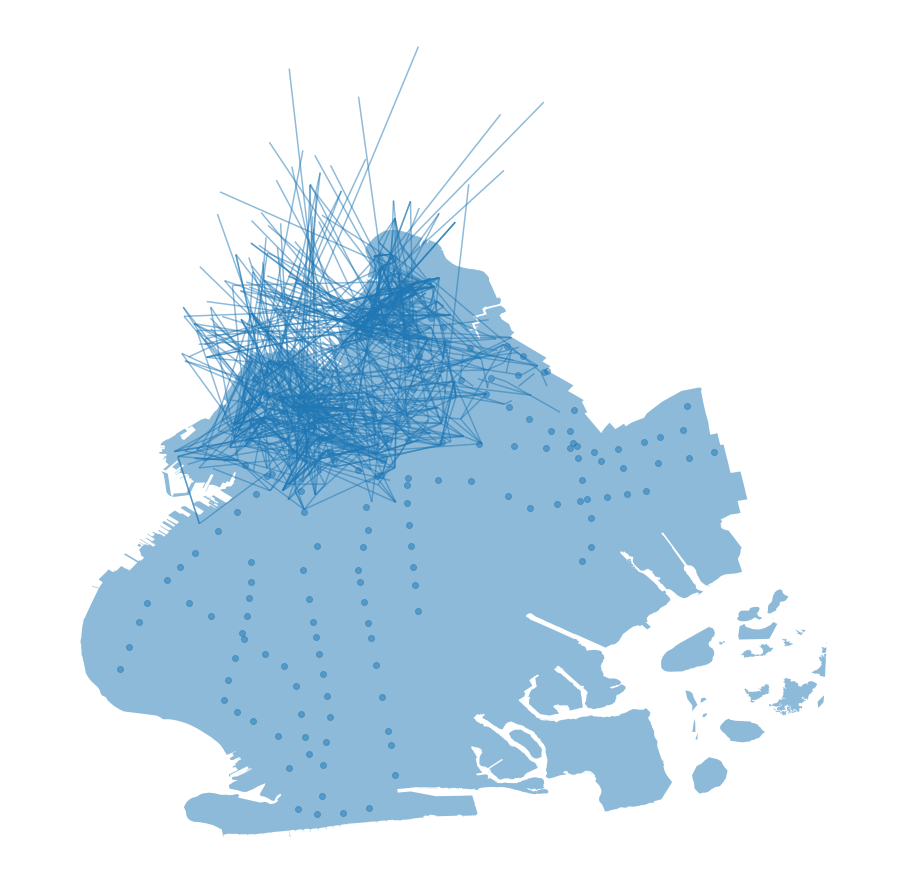

In [235]:
fig, ax = plt.subplots(figsize=(16, 16))
BLYN.plot(alpha=.5, ax=ax)
BLYN_CITI.plot(alpha=.5, ax=ax)
BLYN_STATION.plot(alpha=.5, ax=ax)
plt.axis('equal')
ax.set_axis_off()
plt.show()

In [101]:
import pyproj as proj

# setup your projections
crs_wgs = proj.Proj(init='epsg:4326') # assuming you're using WGS84 geographic
crs_bng = proj.Proj(init='epsg:27700') # use a locally appropriate projected CRS

# then cast your geographic coordinate pair to the projected system
x, y = proj.transform(crs_wgs, crs_bng, input_lon, input_lat)


import geopandas as gpd
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt

# handle all points and create relating lines
pA1 = Point(NaN, 1.75)
pA2 = Point(2, 2)
line_A = LineString([[pA1.x, pA1.y], [pA2.x, pA2.y]])
pB1 = Point(3.0, 2.0)
pB2 = Point(3, 4)
line_B = LineString([[pB1.x, pB1.y], [pB2.x, pB2.y]])
pC1 = Point(2.5, 1.25)
pC2 = Point(1, 1)
line_C = LineString([[pC1.x, pC1.y], [pC2.x, pC2.y]])

# create a geodataframe,
# assigning the column containing `LineString` as its geometry
pts_and_lines = gpd.GeoDataFrame([['A', pA1, pA2, 16, line_A],
            ['B', pB1, pB2, 18, line_B],
            ['C', pC1, pC2, 19, line_C]],
            columns=['id', 'beg_pt', 'end_pt', 'value', 'LineString_obj'], 
            geometry='LineString_obj')  # declare LineString (last column) as the `geometry`

# make a plot of the geodataframe obtained
f, ax = plt.subplots(1, figsize = [4, 4])
pts_and_lines.plot(ax=ax, column = 'value');
plt.show()

NameError: name 'input_lon' is not defined

In [84]:
pts_and_lines

,id,beg_pt,end_pt,value,LineString_obj
0,A,POINT (1.5 1.75),POINT (2 2),16,"LINESTRING (1.50000 1.75000, 2.00000 2.00000)"
1,B,POINT (3 2),POINT (3 4),18,"LINESTRING (3.00000 2.00000, 3.00000 4.00000)"
2,C,POINT (2.5 1.25),POINT (1 1),19,"LINESTRING (2.50000 1.25000, 1.00000 1.00000)"
